<a href="https://colab.research.google.com/github/AdithyaMaddala/From-Raw-Data-to-Business-Value-The-Delhivery-Story/blob/main/case_delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://upload.wikimedia.org/wikipedia/commons/2/23/Delhivery_Logo_%282019%29.png)
#**<font color='blue'>Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

#Business requirement: Feature Engineering after data cleaning

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it
```
Data Cleaning and Preprocessing:
a. Handling missing values: Identify and address missing data (e.g., imputation, deletion).
b. Data consistency: Ensure data is accurate, consistent, and free from errors.
c. Data transformation: Convert data into appropriate formats (e.g., numerical, categorical).
d. Feature engineering: Create new variables or features that might be relevant for modeling.
```

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to view all the columns without skipping in between columns
pd.set_option('display.max_columns',None)

In [ ]:
# downloading the dataset
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

--2024-08-12 07:52:30--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.129, 13.224.9.103, 13.224.9.24, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv?1642751181’

delhivery_data.csv? 100%[===================>]  53.04M  86.1MB/s    in 0.6s    

2024-08-12 07:52:30 (86.1 MB/s) - ‘delhivery_data.csv?1642751181’ saved [55617130/55617130]



In [ ]:
df = pd.read_csv('delhivery_data.csv?1642751181')
df.head(15)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


* converting time columns to pandas datetime format

In [ ]:
# converting the eligible datetime columns to datetime format
time_cols = ('od_end_time od_start_time trip_creation_time').split(' ')
for i in time_cols:
  df[i] = pd.to_datetime(df[i])

* checking null values

In [ ]:
na = ((df.isna().sum() / len(df)) * 100).reset_index()
na = na.rename(columns={'index':'Column Name',0:'% of nulls'})
print('Below are the only attributes having nulls')
print(na[na['% of nulls'] > 0].reset_index(drop=True))

Below are the only attributes having nulls
        Column Name  % of nulls
0       source_name    0.202254
1  destination_name    0.180165


* as nulls are <0.5% so removing all the rows with at least one null in any column

In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

#<font color='dark'>**3. Merging of rows and aggregation of fields**

* Groupping by sub-journey in the trip

In [ ]:
df[df['trip_uuid'] == 'trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


Here for the above trip ID there are 10 data points which means they are at every check point and for 1st 5 rows source and destination is same but from 6th data point destination has become the source and new destination is created this tells us that there are intrim warehouses where it make the small packets to accumulate a large shipment which can save the logistical costs

* Step 1: Merge the rows based on trip_uuid, source and destnation codes
* Step 2: Also aggregate the columns based on their calculation type like for segment it should be sum and for cumulatives it should be last

In [ ]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()


df[[col + '_sum' for col in segment_cols]].iloc[:10]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
5,15.0,12.1171,11.0
6,43.0,21.2890,17.0
7,64.0,35.8252,28.0
8,74.0,47.1900,38.0
9,100.0,53.2334,44.0


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum'],
      dtype='object')

* aggregation at sub-journey level

In [ ]:
create_segment_dict = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'trip_uuid':'first',
    'source_center':'first',
    'source_name':'first',

    'destination_center':'last',
    'destination_name':'last',

    'od_start_time':'first',
    'od_end_time':'first',
    'start_scan_to_end_scan':'first',

    'actual_distance_to_destination':'last',
    'actual_time':'last',

    'osrm_time':'last',
    'osrm_distance':'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last'
}

* Groupby mini-trips, sorting by time

In [ ]:
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'],ascending=True).reset_index()

In [ ]:
segment.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0


In [ ]:
segment[segment['trip_uuid'] == 'trip-153741093647649320']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
10370,10370,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,49.4772,44.0
10371,10371,trip-153741093647649320IND388620AABIND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,53.2334,44.0


Now for the same trip_uuid 10 data points have been reduced to 2 data points and now
* Step 1: Merge both the rows using trip_uuid and aggregate all required attributes with sum and select first for source and last for destination code as well as place

In [ ]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26222 non-null  int64         
 1   segment_key                     26222 non-null  object        
 2   data                            26222 non-null  object        
 3   trip_creation_time              26222 non-null  datetime64[ns]
 4   route_schedule_uuid             26222 non-null  object        
 5   route_type                      26222 non-null  object        
 6   trip_uuid                       26222 non-null  object        
 7   source_center                   26222 non-null  object        
 8   source_name                     26222 non-null  object        
 9   destination_center              26222 non-null  object        
 10  destination_name                26222 non-null  object        
 11  od

**Calculate time taken between od_start_time and od_end_time and keep it as a feature.**

----
* od_time_diff_hour is matching with start_scan_to_end_scan

In [ ]:
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds()/(60) #atually it is in minutes not hours
print(segment['od_time_diff_hour'])

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26217      62.115193
26218      91.087797
26219      44.174403
26220     287.474007
26221      66.933565
Name: od_time_diff_hour, Length: 26222, dtype: float64


In [ ]:
segment.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929


In [ ]:
create_trip_dict = {
    'data' : 'first',
    'trip_creation_time':'first',
    'route_schedule_uuid':'first',
    'route_type':'first',
    'trip_uuid':'first',

    'source_center':'first',
    'source_name':'first',

    'destination_center':'last',
    'destination_name':'last',

    'start_scan_to_end_scan':'sum',
    'od_time_diff_hour':'sum',

    'actual_distance_to_destination':'sum',
    'actual_time':'sum',
    'osrm_time':'sum',
    'osrm_distance':'sum',

    'segment_actual_time_sum':'sum',
    'segment_osrm_distance_sum':'sum',
    'segment_osrm_time_sum':'sum'
}

In [ ]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)

In [ ]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0


In [ ]:
trip[trip['trip_uuid']=='trip-153671041653548748']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.1098,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0


Finally 10 data points of a specific trip_uuid is compressed to 1 data point which consists of only source and final destination places and also its segment and actual times of trips of all each check points

In [ ]:
# this is a pre-requisite for feature engineering concept for this data set
trip['destination_name'] = trip['destination_name'].str.lower()
trip['source_name'] = trip['source_name'].str.lower()

#<font color='dark'>**2. Feature Engineering**

In [ ]:
# Extracting state, city, code and place in source and destination_name attribute, by creating specific functions for it with split
# example: Anand_VUNagar_DC (Gujarat)	--> anand - city, VUNagar - city_place, DC - code, Gujarat - state

def place2state(x):
  state = x.split('(')[1] # Extracting state
  return state[:-1]       # removing ")" at the end

def place2city(x):
  x = x.split(' (')[0]    # Will remove state
  city = x.split('_')[0]  # get the first element that is city
  return city

def place2city_place(x):
  x = x.split(' (')[0]    # Will remove state

  ln = len(x.split('_'))  # Checking lenght of the first part is to make sure it has city and place separately
  if ln > 2:
    return x.split('_')[1]  # return if city and place are differently positioned
  if ln==2:
    return x.split('_')[0] # Small cities have same city and place name

  return x.split(' ')[0]

def place2code(x):
  x = x.split(' (')[0]    # Will remove state
  if len(x.split('_'))>=3:  # if the place has 3 elements without state then it will have code
    return x.split('_')[-1]

  return 'None'           # for less than 2 elements in the place then it means there is no code in this case will return None

In [ ]:
trip['source_state'] = trip['source_name'].apply(lambda x: place2state(x))      # Extracting state
trip['source_city'] = trip['source_name'].apply(lambda x: place2city(x))        # Extracting city
trip['source_place'] = trip['source_name'].apply(lambda x: place2city_place(x)) # Extracting place in city
trip['source_code'] = trip['source_name'].apply(lambda x: place2code(x))        # Extracting code

In [ ]:
trip[['source_state','source_city','source_place','source_code']]

,source_state,source_city,source_place,source_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai hub,mumbai,None
4,karnataka,bellary,bellary,None
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,fbd,balabhgarh,dpc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirunelveli,vdkkusrt,i


In [ ]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: place2state(x))      # Extracting state
trip['destination_city'] = trip['destination_name'].apply(lambda x: place2city(x))        # Extracting city
trip['destination_place'] = trip['destination_name'].apply(lambda x: place2city_place(x)) # Extracting place in city
trip['destination_code'] = trip['destination_name'].apply(lambda x: place2code(x))        # Extracting code

In [ ]:
trip[['destination_state','destination_city','destination_place','destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip
4,karnataka,sandur,wrdn1dpp,d
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,faridabad,blbgarh,dc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirchchndr,shnmgprm,d


**Extraction of year, month, day, week, weekday, hour of the day from trip creation time**

In [ ]:
trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek
trip['trip_hour'] = trip['trip_creation_time'].dt.hour

**Here we actually don't require to extract year because all the data belongs to the year 2018 and 2 months are September & October where Oct does not have much trips**

In [ ]:
trip[['trip_year','trip_month','trip_week','trip_day','trip_dayofweek','trip_hour']]

,trip_year,trip_month,trip_week,trip_day,trip_dayofweek,trip_hour
0,2018,9,37,12,2,0
1,2018,9,37,12,2,0
2,2018,9,37,12,2,0
3,2018,9,37,12,2,0
4,2018,9,37,12,2,0
...,...,...,...,...,...,...
14782,2018,10,40,3,2,23
14783,2018,10,40,3,2,23
14784,2018,10,40,3,2,23
14785,2018,10,40,3,2,23


In [ ]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_day,trip_week,trip_dayofweek,trip_hour,destination_state,destination_city,destination_place,destination_code
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,uttar pradesh,kanpur,central,6,2018,9,12,37,2,0,uttar pradesh,kanpur,central,6
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,karnataka,doddablpur,chikadpp,d,2018,9,12,37,2,0,karnataka,doddablpur,chikadpp,d
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,haryana,gurgaon,bilaspur,hb,2018,9,12,37,2,0,haryana,gurgaon,bilaspur,hb
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,maharashtra,mumbai hub,mumbai,None,2018,9,12,37,2,0,maharashtra,mumbai,mirard,ip
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,karnataka,bellary,bellary,None,2018,9,12,37,2,0,karnataka,sandur,wrdn1dpp,d


In [ ]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']

#Find outliers in numerical variable (you might find outliers in almost all the variables), and visualize it using visual analysis

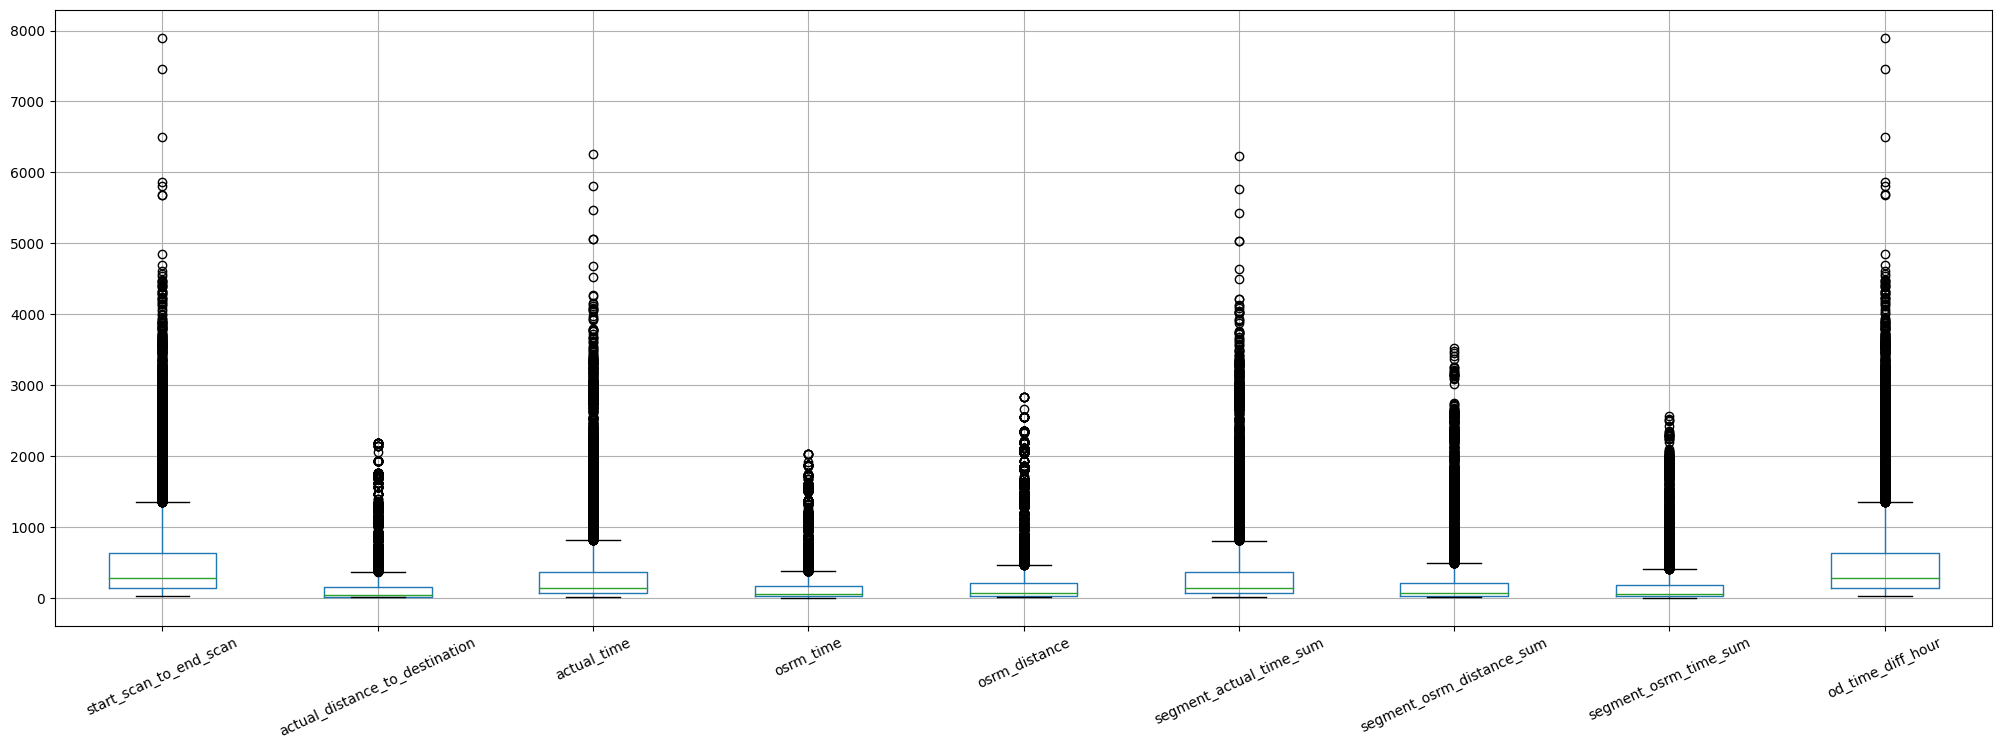

In [ ]:
trip[num_cols].boxplot(rot=25,figsize=(25,8))
plt.show()

From the above boxplots of all the numerical attributes we can see there are outiers for all of them so to reduce them below are some methods
* IQR
* Standardization or Minmaxscaler
* Normalization

#<font color='dark'>**5. Missing values Treatment & Outlier treatment using IQR**

In [ ]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5*IQR)) | (trip[num_cols] > (Q3 + 1.5*IQR))).any(axis=1)]
trip.reset_index(drop=True)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_day,trip_week,trip_dayofweek,trip_hour,destination_state,destination_city,destination_place,destination_code
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,karnataka,doddablpur,chikadpp,d,2018,9,12,37,2,0,karnataka,doddablpur,chikadpp,d
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,maharashtra,mumbai hub,mumbai,None,2018,9,12,37,2,0,maharashtra,mumbai,mirard,ip
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,karnataka,bellary,bellary,None,2018,9,12,37,2,0,karnataka,sandur,wrdn1dpp,d
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,190.487849,24.597048,61.0,23.0,28.0647,60.0,28.0647,23.0,tamil nadu,chennai,chennai,None,2018,9,12,37,2,0,tamil nadu,chennai,chennai,None
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,98.005634,9.100510,24.0,13.0,12.0184,24.0,12.0184,13.0,tamil nadu,chennai,chrompet,dpc,2018,9,12,37,2,0,tamil nadu,chennai,vandalur,dc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0,punjab,chandigarh,mehmdpur,h,2018,10,3,40,2,23,punjab,chandigarh,mehmdpur,h
12719,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0,haryana,fbd,balabhgarh,dpc,2018,10,3,40,2,23,haryana,faridabad,blbgarh,dc
12720,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0,uttar pradesh,kanpur,govndngr,dc,2018,10,3,40,2,23,uttar pradesh,kanpur,govndngr,dc
12721,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0,tamil nadu,tirunelveli,vdkkusrt,i,2018,10,3,40,2,23,tamil nadu,tirchchndr,shnmgprm,d


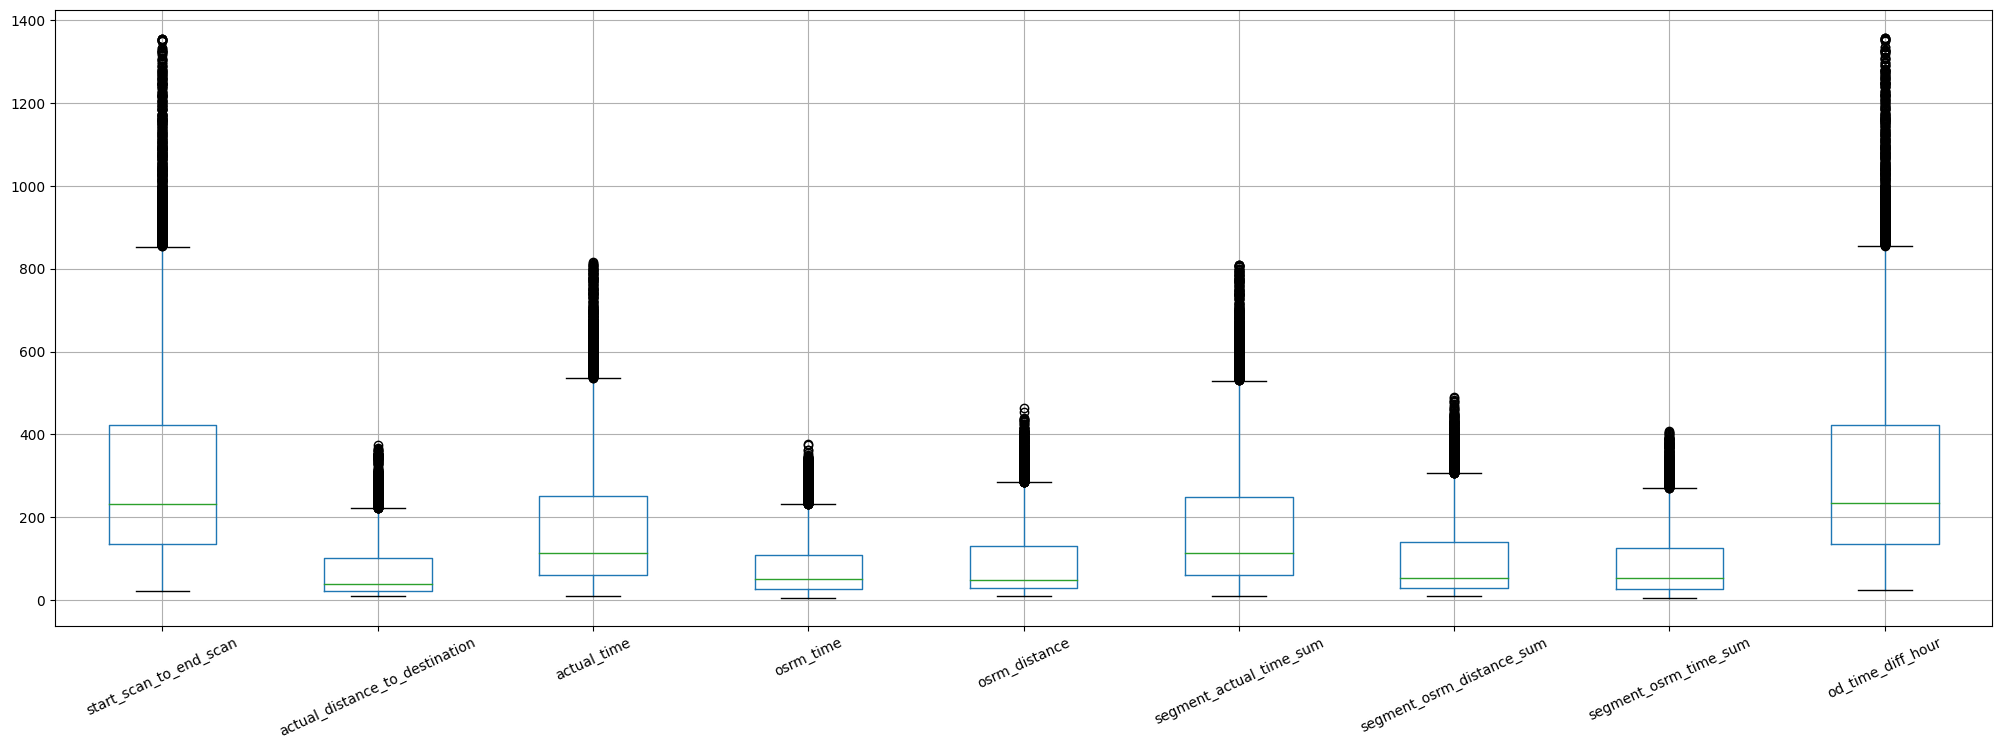

In [ ]:
trip[num_cols].boxplot(rot=25,figsize=(25,8))
plt.show()

In [ ]:
trip_copy = trip.copy() # creating a trip copy for calculating avg of time attributes before converting them to standard scaler values
# df.copy() creates a deep copy

In [ ]:
print(trip.route_type.value_counts())

route_type
Carting    8812
FTL        3911
Name: count, dtype: int64


In [ ]:
# One hot encoding for route_type
trip['route_type'] = trip['route_type'].map({'FTL':0,'Carting':1})

# <font color='dark'>**8. Column Normalization /Column Standardization**</font>
**As there are still many outliers lets use standardization method using StandardScaler or MinMaxScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trip[num_cols])

StandardScaler()

In [ ]:
trip[num_cols] = scaler.transform(trip[num_cols])

In [ ]:
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
1,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,-0.544839
3,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,-0.861856
4,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,1.552812
5,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,-0.510150
6,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,-0.871585
...,...,...,...,...,...,...,...,...,...
14782,-0.247231,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.349273,-0.300349,-0.246189
14783,-1.018130,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.863608,-0.941038,-1.017809
14784,0.394533,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.072932,0.026276,0.395103
14785,0.104957,0.865940,0.547267,1.390274,0.886261,0.523279,1.324267,1.697092,0.107436


#<font color='dark'>**1. EDA**

In [ ]:
def range_of_data(data):
  import pandas as pd
  dic = {'measure':['min','max','range','mean','count']}
  for i in data.select_dtypes(include=[np.number,'datetime64[ns]']):
    dic[i] = [data[i].min(),data[i].max(),data[i].max()-data[i].min(),data[i].mean(),len(data[i].value_counts())]
  dic = pd.DataFrame(dic)
  return dic
range_of_data(trip_copy)

,measure,trip_creation_time,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,trip_year,trip_month,trip_day,trip_week,trip_dayofweek,trip_hour
0,min,2018-09-12 00:00:22.886430,23.000000,23.461468,9.002461,9.000000,6.000000,9.07290,9.000000,9.072900,6.000000,2018.0,9.000000,1.00000,37.000000,0.000000,0.000000
1,max,2018-10-03 23:59:42.701692,1355.000000,1357.397291,373.441224,815.000000,376.000000,463.47810,810.000000,489.571600,408.000000,2018.0,10.000000,30.00000,40.000000,6.000000,23.000000
2,range,21 days 23:59:19.815262,1332.000000,1333.935823,364.438763,806.000000,370.000000,454.40520,801.000000,480.498700,402.000000,0.0,1.000000,29.00000,3.000000,6.000000,23.000000
3,mean,2018-09-22 13:16:08.771620608,320.178731,321.022701,72.317812,177.452723,78.440305,91.73403,175.796274,97.971558,85.908355,2018.0,9.121905,18.35707,38.300008,2.914171,12.421677
4,count,12723,1171.000000,12723.000000,12707.000000,753.000000,344.000000,12641.00000,742.000000,12661.000000,385.000000,1.0,2.000000,22.00000,4.000000,7.000000,24.000000


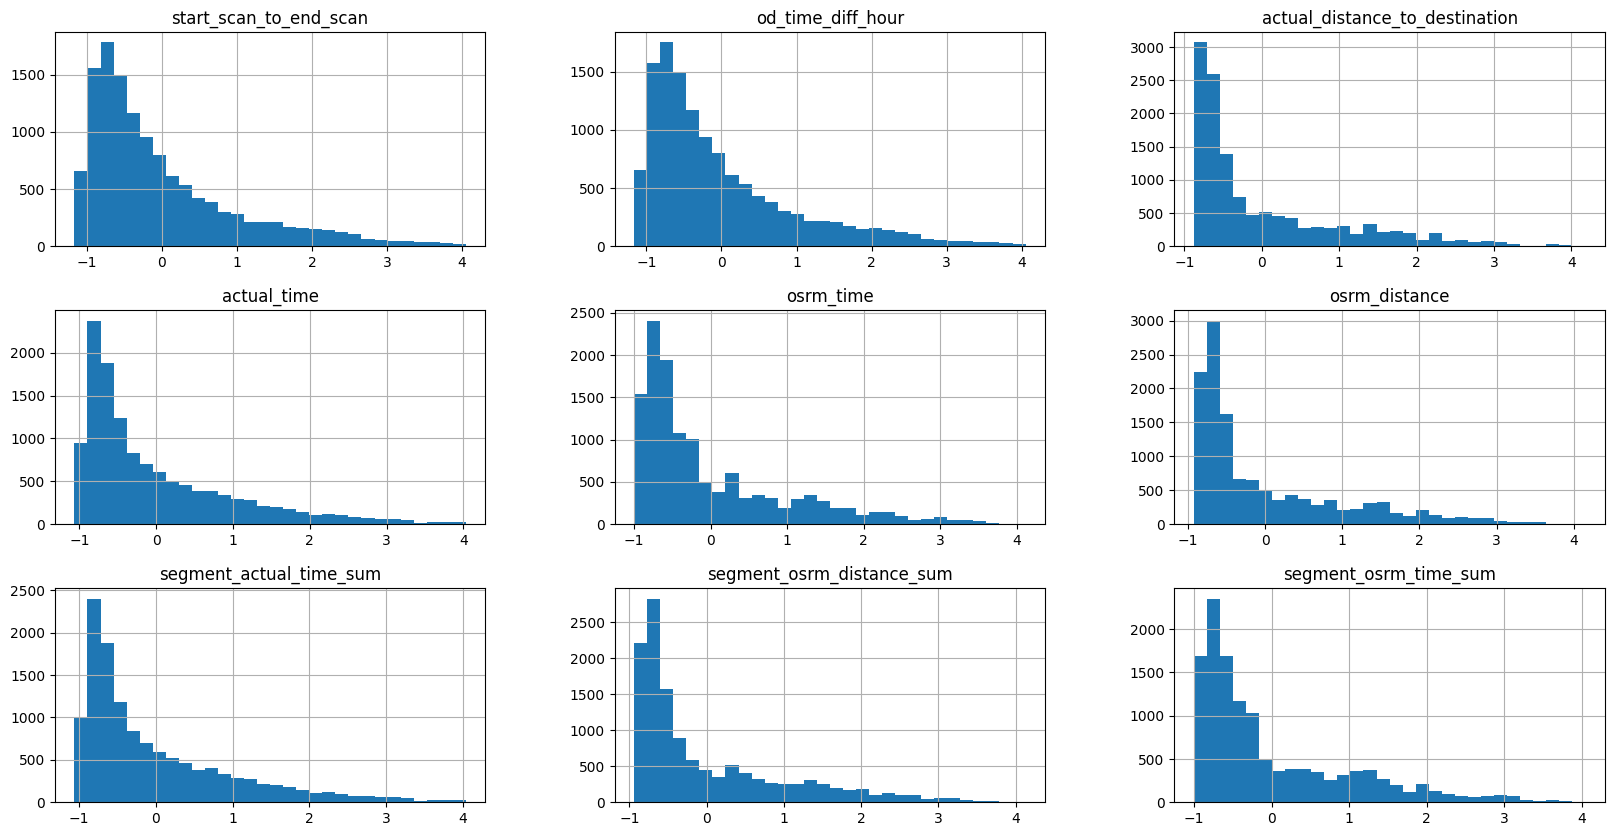

In [ ]:
# Distribution of data after cleaning and processing
cor = ('start_scan_to_end_scan	od_time_diff_hour	actual_distance_to_destination	actual_time	osrm_time	osrm_distance	segment_actual_time_sum	segment_osrm_distance_sum	segment_osrm_time_sum').split()
trip[cor].hist(bins=30,figsize=(20,10))
plt.show()

In [ ]:
from google.colab import files # To work on the trip dataset and to avoid running of all the above codes downloading it in CSV format

trip.to_csv('trip.csv')
files.download('trip.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files # Uploading the trip file which was converted earlier
uploaded = files.upload()

Saving trip.csv to trip.csv


In [ ]:
# run this only if the trip is uploaded using the above block
trip = pd.read_csv('trip.csv')
trip = trip.iloc[:,1:] # to remove old index
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,source_state,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code,trip_year,trip_month,trip_day,trip_week,trip_dayofweek,trip_hour
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,1,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),-0.548546,-0.544839,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,karnataka,doddablpur,chikadpp,d,karnataka,doddablpur,chikadpp,d,2018,9,12,37,2,0
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,1,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),-0.861602,-0.861856,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,maharashtra,mumbai hub,mumbai,NaN,maharashtra,mumbai,mirard,ip,2018,9,12,37,2,0
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,0,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),1.552838,1.552812,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,karnataka,bellary,bellary,NaN,karnataka,sandur,wrdn1dpp,d,2018,9,12,37,2,0
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,1,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),-0.513328,-0.510150,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,tamil nadu,chennai,chennai,NaN,tamil nadu,chennai,chennai,NaN,2018,9,12,37,2,0
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,1,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),-0.869428,-0.871585,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,tamil nadu,chennai,chrompet,dpc,tamil nadu,chennai,vandalur,dc,2018,9,12,37,2,0


# **<font color='dark'>4. Comparison & Visualization of time and distance fields**
**To compare 2 numerical columns we can use 2 sample ttest**
**Compare the difference between od_time_diff_hour and start_scan_to_end_scan. Hypothesis testing/ Visual analysis.**

```
>H0 : There is no significant difference between od_time_diff and start_scan_to_end_scan
>Ha : There is a significant difference between od_time_diff and start_scan_to_end_scan
```

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(trip.start_scan_to_end_scan, trip.od_time_diff_hour)

TtestResult(statistic=-1.870736693580285e-15, pvalue=0.9999999999999984, df=25444.0)

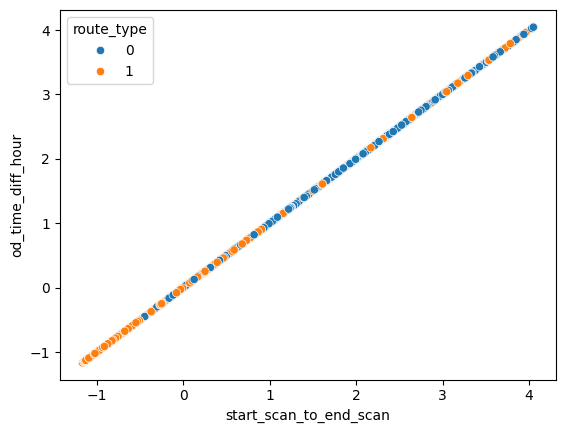

In [ ]:
sns.scatterplot(data=trip, x='start_scan_to_end_scan',y='od_time_diff_hour',hue='route_type')
plt.show()

**Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value**

```
>H0 : There is no significant difference between actual_time and OSRM time
>Ha : There is a significant difference between actual_time and OSRM time
```

In [ ]:
ttest_ind(trip.actual_time,	trip.osrm_time)

TtestResult(statistic=-9.977262365761521e-15, pvalue=0.999999999999992, df=25444.0)

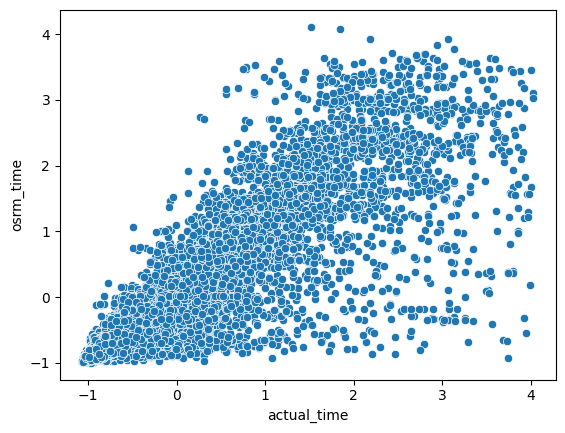

In [ ]:
sns.scatterplot(data=trip, x='actual_time',y='osrm_time')
plt.show()

**Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value**

```
>H0 : There is no significant difference between actual_time and segment actual time
>Ha : There is a significant difference between actual_time and segment actual time
```

In [ ]:
ttest_ind(trip.actual_time,trip.segment_actual_time_sum)

TtestResult(statistic=-3.563307987771972e-15, pvalue=0.9999999999999971, df=25444.0)

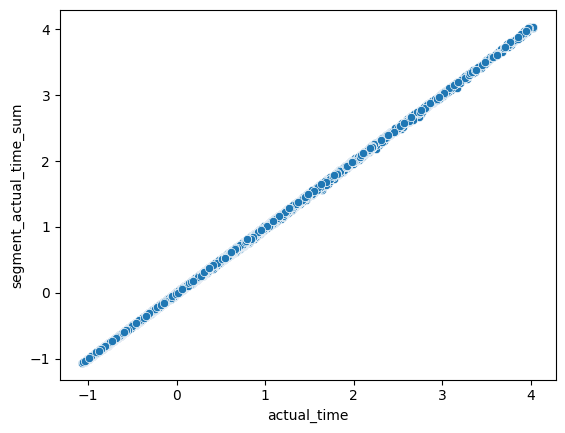

In [ ]:
sns.scatterplot(data=trip, x='actual_time',y='segment_actual_time_sum')
plt.show()

**Do hypothesis testing/ visual analysis between OSRM distance aggregated value and segment OSRM distance aggregated value**

```
>H0 : There is no significant difference between OSRM distance and segment OSRM distance
>Ha : There is a significant difference between OSRM distance and segment OSRM distance
```

In [ ]:
ttest_ind(trip.osrm_distance,trip.segment_osrm_distance_sum)

TtestResult(statistic=9.977262365761521e-15, pvalue=0.999999999999992, df=25444.0)

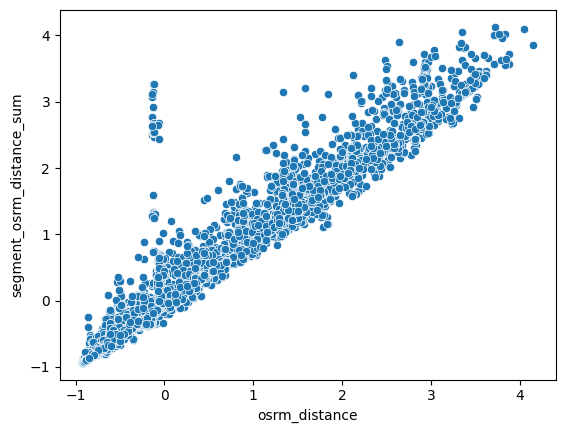

In [ ]:
sns.scatterplot(data=trip, x='osrm_distance',y='segment_osrm_distance_sum')
plt.show()

**Do hypothesis testing/ visual analysis between OSRM time aggregated value and segment OSRM time aggregated value**

```
>H0 : There is no significant difference between OSRM time and segment OSRM time
>Ha : There is a significant difference between OSRM distance and segment OSRM time
```

In [ ]:
# Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value
ttest_ind(trip.osrm_time,trip.segment_osrm_time_sum)

TtestResult(statistic=-1.0689923963315917e-15, pvalue=0.9999999999999991, df=25444.0)

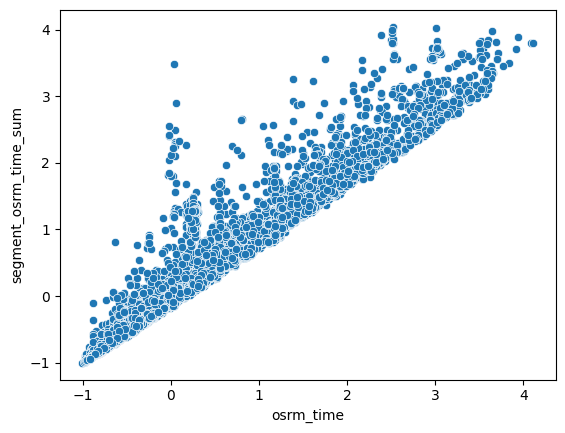

In [ ]:
sns.scatterplot(data=trip, x='osrm_time',y='segment_osrm_time_sum')
plt.show()

#<font color='cream'> ***Result:***
#As the <font color='begie'> p_value of all the hypothesis testing</font> between time and distance attributes is almost equal to <font color='red'>**1**</font> therefore there is <font color='orange'> **no significant differece**</font> in times and distances (actual/osrm/segment)

#<font color='dark'>**6. Checking relationship between aggregated fields**

<Axes: >

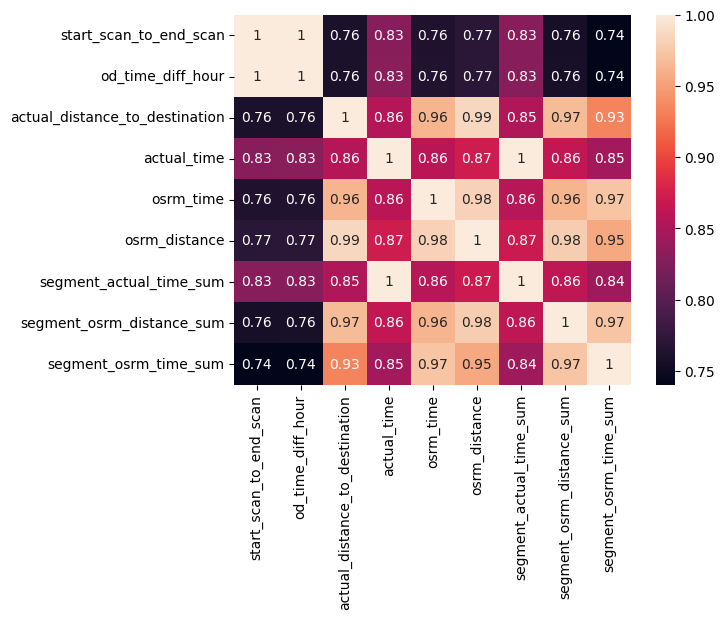

In [ ]:
cor = ('start_scan_to_end_scan	od_time_diff_hour	actual_distance_to_destination	actual_time	osrm_time	osrm_distance	segment_actual_time_sum	segment_osrm_distance_sum	segment_osrm_time_sum').split()
sns.heatmap(trip[cor].corr(),annot=True)
plt.show()

# Busiest year, month, week, day, weekday, hour by visual analysis

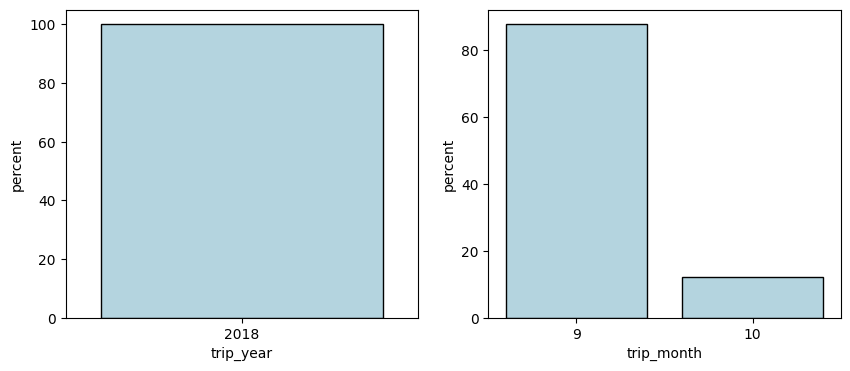

In [67]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data=trip,x='trip_year',stat='percent',edgecolor='black',color='lightblue')
plt.subplot(1,2,2)
sns.countplot(data=trip,x='trip_month',stat='percent',edgecolor='black',color='lightblue')
plt.show()

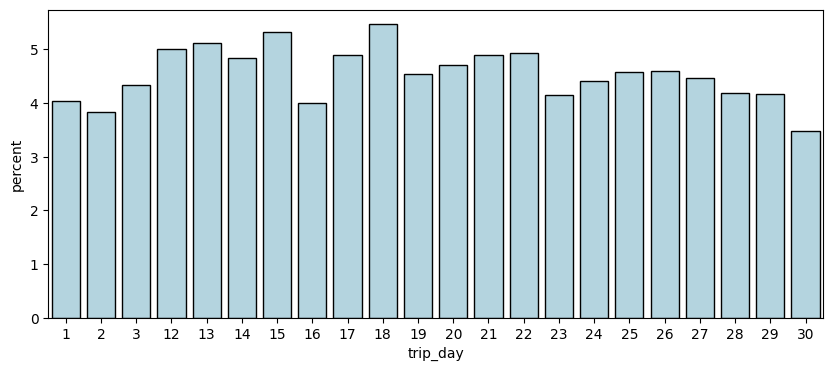

In [69]:
plt.figure(figsize=(10,4))
sns.countplot(data=trip,x='trip_day',edgecolor='black',color='lightblue',stat='percent')
plt.show()

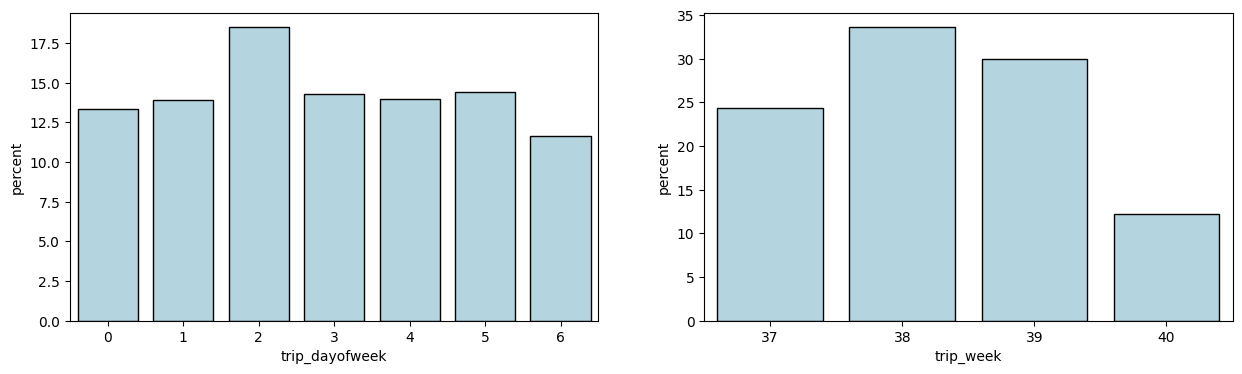

In [71]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=trip,x='trip_dayofweek',stat='percent',edgecolor='black',color='lightblue')
plt.subplot(1,2,2)
sns.countplot(data=trip,x='trip_week',stat='percent',edgecolor='black',color='lightblue')
plt.show()

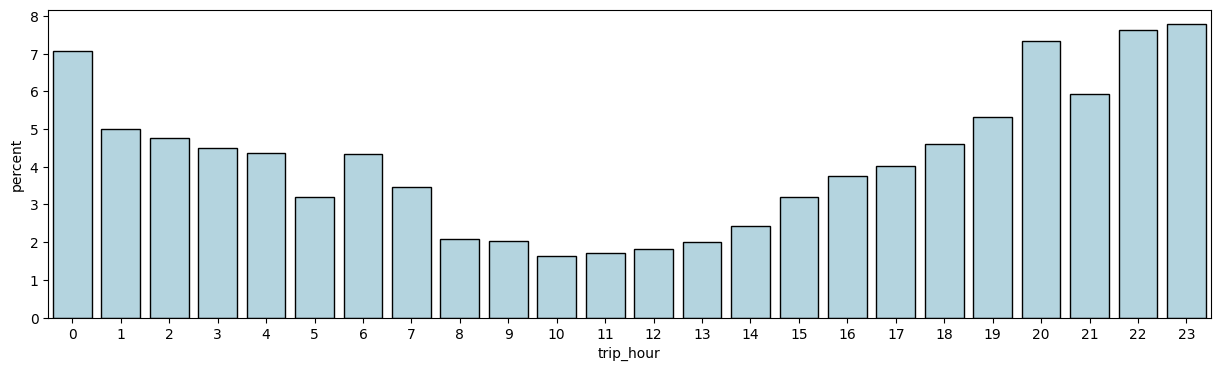

In [72]:
plt.figure(figsize=(15,4))
sns.countplot(data=trip,x='trip_hour',stat='percent',edgecolor='black',color='lightblue')
plt.show() # most of the trips are being created from 8 PM to 12 AM

# Avg time and distance with actual/segment/osrm

In [ ]:
(trip_copy['od_time_diff_hour'] - trip_copy['start_scan_to_end_scan']).mean()

0.8439691847926328

**There is a difference in time between trip start to end time and actual logistical time**

In [ ]:
(trip_copy['actual_time'] - trip_copy['osrm_time']).mean()

99.01241845476696

In [ ]:
(trip_copy['segment_actual_time_sum'] - trip_copy['segment_osrm_time_sum']).mean()

89.88791951583745

**There is a delay of about 100 minutes in actal trip time from the algorithm estimated time**

**Same is with segment actual time and algorithm segment estimated time**

Reasons:
1. Labour shortage
2. Transport unavailablity
3. Higher traffic than usual or expected
4. Bad supervision

In [ ]:
(trip_copy['actual_distance_to_destination']-trip_copy['osrm_distance']).mean()

-19.41621853591435

In [51]:
(trip_copy['actual_distance_to_destination'] - trip_copy['segment_osrm_distance_sum']).mean()

-25.65374661105386

**This suggests that actual route is less than the algorithm's distance with both osrm distance and segment distance**

Reasons:
1. Drivers might know any short/faster routes which algorithm can't actually know

#<font color='dark'>**7. Handling categorical values**

In [ ]:
print(trip[trip.source_state==trip.destination_state].groupby(['source_state','destination_state']).count()['data'].sort_values(ascending=False)[:5])

source_state  destination_state
maharashtra   maharashtra          2275
karnataka     karnataka            2007
tamil nadu    tamil nadu           1016
haryana       haryana               792
telangana     telangana             669
Name: data, dtype: int64


In [ ]:
print(trip[trip.source_state!=trip.destination_state].groupby(['source_state','destination_state']).count()['data'].sort_values(ascending=False)[:5])

source_state  destination_state
delhi         haryana              384
haryana       delhi                308
              punjab                94
              rajasthan             82
              uttar pradesh         76
Name: data, dtype: int64


In [56]:
print(trip_copy.groupby(['source_city','destination_city']).agg({'data':'count'}).sort_values(by='data',ascending=False)[:5])

                              data
source_city destination_city      
bengaluru   bengaluru          566
bangalore   bengaluru          455
hyderabad   hyderabad          349
mumbai      mumbai             338
bhiwandi    mumbai             331


* According to intra state trip creations maharashtra is on the top

* busiest corridor is delhi to haryana and haryana to delhi but haryana ships more to other states where 2nd, 3rd, 4th and 5th places are occupied by Haryana state in exporting the goods

Busiest corridor insights
```
state to state
1. Within the state : Maharashtra, Karnataka
2. State to state   : Delhi to Haryana, Haryana to Delhi
```
```
city to city
1. Within the city : Banglore/Benguluru, Hyderabad
2. One city to other: Bhiwandi to Mumbai


**By Source**
1. State with most sending state i.e., source state

In [ ]:
print('Most business is from below states\n',trip.source_state.value_counts()[:5])

Most business is from below states
 source_state
maharashtra    2308
karnataka      2025
haryana        1365
tamil nadu     1032
telangana       701
Name: count, dtype: int64


In [ ]:
print('Top cities of maharashtra\n',trip[trip.source_state=='maharashtra']['source_city'].value_counts()[:5])
print('-'*50)
print('Top cities of karnataka\n',trip[trip.source_state=='karnataka']['source_city'].value_counts()[:5])

Top cities of maharashtra
 source_city
mumbai        653
bhiwandi      540
pune          323
mumbai hub    300
lowerparel     65
Name: count, dtype: int64
--------------------------------------------------
Top cities of karnataka
 source_city
bengaluru        1034
bangalore         568
hbr layout pc      79
gulbarga           40
blr                40
Name: count, dtype: int64


In [ ]:
print('Most business doing cities\n',trip.source_city.value_counts()[:5])

Most business doing cities
 source_city
bengaluru    1034
gurgaon       745
mumbai        653
bangalore     568
bhiwandi      540
Name: count, dtype: int64


In [ ]:
print('Top places of bengaluru\n',trip['source_place'][trip.source_city=='bengaluru'].value_counts()[:5])
print('-'*50)
print('Top places of gurgaon\n',trip['source_place'][trip.source_city=='gurgaon'].value_counts()[:5])

Top places of bengaluru
 source_place
bomsndra    440
kgairprt    295
peenya      116
hoodi        43
khroad       40
Name: count, dtype: int64
--------------------------------------------------
Top places of gurgaon
 source_place
bilaspur    691
begumpur     44
gurgaon       8
central       2
Name: count, dtype: int64


In [97]:
print('Most business doing source places\n',trip.groupby(['source_state','source_place']).agg({'data':'count'}).sort_values(by='data',ascending=False)[:5])

Most business doing source places
                           data
source_city source_place      
gurgaon     bilaspur       691
bangalore   nelmngla       544
bhiwandi    mankoli        540
bengaluru   bomsndra       440
mumbai hub  mumbai         300


In [99]:
print('Most business doing source places\n',trip.groupby(['source_city','source_place','source_code',]).agg({'data':'count'}).sort_values(by='data',ascending=False)[:5])

Most business doing source places
                                       data
source_city source_place source_code      
gurgaon     bilaspur     hb            669
bangalore   nelmngla     h             544
bhiwandi    mankoli      hb            540
bengaluru   bomsndra     hb            438
mumbai hub  mumbai       None          300


* Maharahstra, Karnataka, Haryana, Tamil Nadu are the leading states with most exports
* Bengaluru/banglore is the leading city with most exports
* Haryana's Bilaspur, Karnataka's Nelmngla, Maharashtra's mankoli are the leading places with most of the exports
* Gurgaon's Bilapur-hb, Bangalore's Nelmngla-h are store codes with most number of number of trips created

**By Destination**

In [82]:
print('Most products importing states\n',(trip['destination_state'].value_counts()[:5]))

Most products importing states
 destination_state
maharashtra    2285
karnataka      2070
haryana        1333
tamil nadu     1040
telangana       682
Name: count, dtype: int64


In [83]:
print('Most products importing cities\n',(trip['destination_city'].value_counts()[:5]))

Most products importing cities
 destination_city
bengaluru    1073
mumbai        964
gurgaon       610
delhi         476
hyderabad     411
Name: count, dtype: int64


In [96]:
print('Most business giving places\n',trip.groupby(['destination_state','destination_place']).agg({'data':'count'}).sort_values(by='data',ascending=False)[:5])

Most business giving places
                                      data
destination_state destination_place      
haryana           bilaspur            597
karnataka         nelmngla            386
maharashtra       mankoli             377
karnataka         bomsndra            331
haryana           kundli              282


In [100]:
print('Most business giving stores\n',trip.groupby(['destination_city','destination_place','destination_code',]).agg({'data':'count'}).sort_values(by='data',ascending=False)[:5])

Most business giving stores
                                                      data
destination_city destination_place destination_code      
gurgaon          bilaspur          hb                 554
bangalore        nelmngla          h                  386
bhiwandi         mankoli           hb                 346
bengaluru        bomsndra          hb                 327
                 kgairprt          hb                 272


* Maharashra, Karnataka, Haryana, Tamil Nadu, Telangana are the states with highest imports
* Bengaluru, mumbai, gurgaon, delhi, hyderabad are the cities with highest imports and all these cities are having IT hubs and infrastructure
* Haryana's Bilaspur, Karnataka's Nelmngla, Maharashtra's mankoli are the leading places with most of the imports
* gurgaon' bilaspur-hb, bangalore's nelmngla -h are the stores with most number of incoming trips

**Avg trip time**

In [75]:
print(trip_copy.groupby(['source_state','destination_state']).agg({'od_time_diff_hour':'mean'}).sort_values(by='od_time_diff_hour',ascending=False)[:5])

                                od_time_diff_hour
source_state destination_state                   
uttarakhand  haryana                  1090.971654
punjab       jammu & kashmir          1057.858474
karnataka    goa                      1008.463555
assam        tripura                   952.167520
west bengal  orissa                    926.398137


In [76]:
print(trip_copy.groupby(['source_state','destination_state']).agg({'od_time_diff_hour':'mean'}).sort_values(by='od_time_diff_hour',ascending=True)[:5])

                                               od_time_diff_hour
source_state           destination_state                        
gujarat                daman & diu                     56.866305
                       dadra and nagar haveli          70.386791
dadra and nagar haveli gujarat                         71.703475
maharashtra            madhya pradesh                  85.529677
uttar pradesh          rajasthan                      131.108982


**Knowing the average trip time we can estimate the delivery time**

#<font color='dark'>**9. Insights**

1. Knowing the average trip time from source to destination for a specific route can help company to predict the estimated delivery date to the destination location
2. Busiest corridor for trips
```
a. within the state is maharahstra and karnataka
b. within the city is Bangaluru, Hyderabad
c. from one state to other is from Delhi to Haryana and Haryana to Delhi
d. from one city to other is Bhiwandi to Mumbai
```
3. Busiest time frame
```
a. Year - 2018 (For this dataset as the data is only for one year)
b. Month - September (For this dataset as the data is only for 2 months of 2018 where Sep had more trips than Oct)
c. Day - 18th day of any month
d. Week - 38th week (Only 4 weeks of data is available in the provided dataset)
e. Hour - 20:00 to 00:00 high number of trips are being created
f. Weekday - Tuesday
```
4. Busiest in outgoing (Source)
```
a. State - Maharahstra, Karnataka, Haryana, Tamil Nadu
b. City - Bengaluru/banglore
c. Place - Haryana's Bilaspur, Karnataka's Nelmngla, Maharashtra's mankoli
d. Code - Gurgaon's Bilapur-hb, Bangalore's Nelmngla-h
```
5. Busiest in incoming (Destination)
```
a. State - Maharahstra, Karnataka, Haryana, Tamil Nadu, Telangana
b. City - Bengaluru/banglore, mumbai, gurgaon, delhi, hyderabad and all these cities are having
IT hubs and infrastructure so it is quite common to get most number of shipments
c. Place - Haryana's Bilaspur, Karnataka's Nelmngla, Maharashtra's mankoli
d. Code - Gurgaon's Bilapur-hb, Bangalore's Nelmngla-h
```
6. Common in source and destinations
> Almost all the states, cities, places and store codes are same for both exporting and importing shipments this tells us the maximum number of trip are being created from the above states, cities, places only

7. Delayed routes
```
a. uttarakhand to haryana, punjab to jammu & kashmir, karnataka to goa
b. these routes are having high average delivery times so try to reduce it
```

8. Fast routes
```
a. gujarat to daman & diu, gujrat to dadra and nagar haveli is the fastest route
```

9. **Based on EDA**

i. Comments on range of attributes, outliers of various attributes:
```
a. Raw data does contains about 1.4 lakh of data points and these are of only 21 days of data so we can imagine how big the data would be for a whole year

b. Range of actual distance is of 364 km and it broadly changes with orsm segment distance and orsm distance with 480, 454 respectively

c. Actual time is way more greater than osrm time and segment osrm time (estimated by an algorithm)
```
ii. Comments on the distribution of the variables and relationship between them
```
a. All the distributions of distance and time variables it is right skewed data
this shows that most of the trips completes in the mean time but some will take exceptionally greater time
b. Reasons for a: Non busiest route so lack of infrastructure
c. For all accumulated time variables with other time variables there is high posivite relaton between them and same goes with distance variables
```

#<font color='dark'> **10. Recommendations**

1. **Improve Operations in Maharashtra**
>Maharashtra is our busiest area. To handle the high demand, especially during sales, we need more delivery vehicles and staff.

2. **Strengthen Delhi-Haryana Route**
> The route between Delhi and Haryana is very busy and will get even busier. We should invest in more delivery options for this area.

3. **Fix Distance Calculations**
>The distances shown on our system often don't match real-world distances. This causes problems with delivery times. We need to improve how we calculate distances.

4. **Improve Delivery Speed**
>Deliveries are taking too long, especially during busy times. We need faster ways to get orders out, like extra vehicles and staff.

5. **Vehicle capacity utilization**
>Analyse vehicle loading patterns to uilize maximum space

6. **Refine OSRM algorithm**
> Incorporation of features like traffic conditions, road closures, time of day variations to improve accuracy

7. **Improve Delivery Speed at less performing corridors**
> Analyze high-performing delivery routes to identify best practices and implement these strategies in areas experiencing significant delays. This approach aims to optimize overall delivery efficiency by replicating successful methods.

8. **RCA for delays**
> We should carefully examine delivery routes that take significantly longer than expected. By understanding why these routes are slower, we can find ways to improve overall delivery speed.